In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
path='/Volumes/LaCie_NIOZ/data/barystatic/revisions/input_data/'
ds = xr.open_dataset(path+'gmsl.nc')
ds = ds.sortby(ds.names)

ds.names

<xarray.DataArray 'names' (names: 16)>
array(['AIS_CSR', 'AIS_IMB', 'AIS_JPL', 'AIS_UCI', 'GIS_CSR', 'GIS_IMB',
       'GIS_JPL', 'GIS_UCI', 'GLA_CSR', 'GLA_JPL', 'GLA_WGP', 'GLA_ZMP',
       'LWS_CSR', 'LWS_GWB', 'LWS_JPL', 'LWS_WGP'], dtype=object)
Coordinates:
  * names    (names) object 'AIS_CSR' 'AIS_IMB' ... 'LWS_JPL' 'LWS_WGP'

In [5]:
ds.sel(names='LWS_JPL')

<xarray.Dataset>
Dimensions:   (names2: 6, time: 332)
Coordinates:
    names     <U7 'LWS_JPL'
  * names2    (names2) object 'LWS_JPL' 'GIS_JPL' ... 'AIS_IMB' 'GIS_IMB'
  * time      (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-08-01
Data variables:
    gmsl      (time) float64 nan nan nan nan nan ... -1.633 1.468 4.326 5.731
    intrisic  (names2, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    global_mean:  Global mean removed form 2003-2012
    units:        mm

In [19]:
names = np.array(ds.names)
names = ['AIS_CSR','AIS_JPL',  'AIS_IMB', 'AIS_UCI',
         'GIS_CSR','GIS_JPL', 'GIS_IMB', 'GIS_UCI', 
         'GLA_CSR', 'GLA_JPL', 'GLA_WGP', 'GLA_ZMP',
       'LWS_CSR','LWS_JPL', 'LWS_GWB',  'LWS_WGP']

In [9]:
x.shape

(332,)

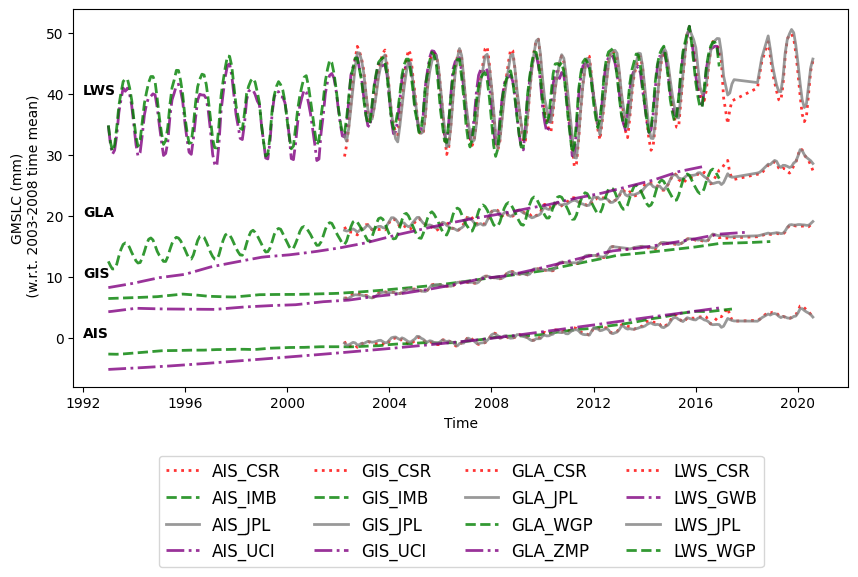

In [20]:
path='/Volumes/LaCie_NIOZ/data/barystatic/revisions/input_data/'
ds = xr.open_dataset(path+'gmsl.nc')
ds = ds.sortby(ds.names)

col_dic = {'CSR':{'col':'red','sty':':', 'width':2,},
          'JPL':{"col":'gray','sty':'-','width':2},
          'IMB':{'col':'green','sty':'--','width':2},
          'WGP':{'col':'green','sty':'--','width':2},
          'GWB':{'col':'purple','sty':'-.','width':2},
          'ZMP':{'col':'purple','sty':'-.','width':2},
          'UCI':{'col':'purple','sty':'-.','width':2}
          }
offsets = {'AIS':0,
          'GIS':0.5+0.5,
          'LWS':3+1,
          'GLA':1.5+0.5}
names = np.array(ds.names)
names = ['AIS_CSR','AIS_JPL',  'AIS_IMB', 'AIS_UCI',
         'GIS_CSR','GIS_JPL', 'GIS_IMB', 'GIS_UCI', 
         'GLA_CSR', 'GLA_JPL', 'GLA_WGP', 'GLA_ZMP',
       'LWS_CSR','LWS_JPL', 'LWS_GWB', 'LWS_WGP']

x = np.array(ds.time)
y = np.array(ds.gmsl)
names = np.array(ds.names)

fig=plt.figure(figsize=(10,5),dpi=100,facecolor='w')

ax=plt.subplot(111)
for i,name in enumerate(names):
    da = ds.sel(names=name)
    y = np.array(da.gmsl)
    reg,n = name.split('_')
    c = col_dic[n]['col']
    s = col_dic[n]['sty']
    w = col_dic[n]['width']
    offset = offsets[reg]
    # offset = 0
    plt.plot(x,y+(offset*10),c=c,linestyle=s,linewidth=w,
             alpha=0.8,
             label=name)
plt.legend(loc='lower left',ncol=4,fontsize=12,
          bbox_to_anchor=(0.1,- 0.5),)

for label in offsets.keys():
    # y=offsets[label]*10
    plt.text(np.datetime64('1992-01-01T06:13:20.000000000'),offsets[label]*10,
             label,weight="bold")
    

plt.ylabel('GMSLC (mm)\n (w.r.t. 2003-2008 time mean)')
plt.xlabel('Time')

plt.show()

In [21]:
path_save = '/Users/ccamargo/Documents/PhD/Barystatic/manuscript/revision_round1/'
path_save = '/Users/ccamargo/Documents/PhD/Barystatic/manuscript/revision_round1/revision-submission/'


In [22]:

fig.savefig(path_save+'figures/gmsl.png',
             format='png',dpi=300,bbox_inches='tight')

In [5]:

path = '/Volumes/LaCie_NIOZ/data/barystatic/revisions/results_final/2003-2016/'
file = 'gmsl_trends.p'
df = pd.read_pickle(path+file)
df = round(df,2)
df = df.sort_values('names').reset_index()

In [6]:
df['dataset'] = [name.split('_')[1] for name in df['names']]

In [7]:
combos = ['JPL','CSR',
          'IMB+WGP','IMB+GWB+ZMP',
          'UCI+WGP','UCI+GWB+ZMP'
         ]

trends = np.zeros((len(combos)))
unc_name = ['temporal','structural','intrinsic']
uncs = np.zeros((len(combos),3))
uncs_tot = np.zeros((len(combos)))
for j, c in enumerate(combos): 
    dataset = c
    if len(c.split('+'))==2:
        df2 = df[df['dataset']==c.split('+')[0]]
        df2 = df2.append(df[df['dataset']==c.split('+')[1]])
    elif len(c.split('+'))==3:
        df2 = df[df['dataset']==c.split('+')[0]]
        df2 = df2.append(df[df['dataset']==c.split('+')[1]])
        df2 = df2.append(df[df['dataset']==c.split('+')[2]])
    else:
        df2 = df[df['dataset']==c]
   
    trends[j] = df2.sum()['trends']

    for i,u in enumerate(unc_name):
        uncs[j,i] = np.sqrt((df2[u]**2).sum())
    uncs_tot[j] = np.sqrt(uncs[j,0]**2 + uncs[j,1]**2 + uncs[j,2]**2)
dfc=pd.DataFrame({'names':combos,'trends':trends,'uncertainty':uncs_tot,
                 'temporal':uncs[:,0],'structural':uncs[:,1],'intrinsic':uncs[:,2]})


In [8]:
df = df.append(dfc)

In [9]:
df = round(df,2)
df

,index,trends,names,region,structural,temporal,intrinsic,uncertainty,dataset
0,4.0,0.32,AIS_CSR,AIS,0.09,0.03,0.00,0.09,CSR
1,13.0,0.37,AIS_IMB,AIS,0.09,0.05,0.07,0.13,IMB
2,0.0,0.27,AIS_JPL,AIS,0.09,0.04,0.04,0.10,JPL
3,14.0,0.48,AIS_UCI,AIS,0.09,0.01,0.00,0.09,UCI
4,5.0,0.72,GIS_CSR,GIS,0.31,0.03,0.00,0.32,CSR
5,11.0,0.53,GIS_IMB,GIS,0.31,0.03,0.07,0.32,IMB
6,1.0,0.73,GIS_JPL,GIS,0.31,0.03,0.01,0.32,JPL
7,12.0,0.06,GIS_UCI,GIS,0.31,0.08,0.00,0.32,UCI
8,7.0,0.68,GLA_CSR,GLA,0.15,0.06,0.00,0.16,CSR
9,3.0,0.64,GLA_JPL,GLA,0.15,0.07,0.01,0.16,JPL


In [10]:
df = df.drop('index',axis=1)
df = df.drop('region',axis=1)
df = df.drop('dataset',axis=1)


In [11]:
df['±'] = ['±' for i in range(len(df))]
cols = ['names','trends','±','uncertainty','temporal', 'structural', 'intrinsic']
df = df[cols]

In [12]:
df = df.set_index('names')

In [13]:
df

,trends,±,uncertainty,temporal,structural,intrinsic
names,,,,,,
AIS_CSR,0.32,±,0.09,0.03,0.09,0.00
AIS_IMB,0.37,±,0.13,0.05,0.09,0.07
AIS_JPL,0.27,±,0.10,0.04,0.09,0.04
AIS_UCI,0.48,±,0.09,0.01,0.09,0.00
GIS_CSR,0.72,±,0.32,0.03,0.31,0.00
GIS_IMB,0.53,±,0.32,0.03,0.31,0.07
GIS_JPL,0.73,±,0.32,0.03,0.31,0.01
GIS_UCI,0.06,±,0.32,0.08,0.31,0.00
GLA_CSR,0.68,±,0.16,0.06,0.15,0.00


In [14]:
df.to_latex(path_save+'gmsl_with_combos_2003.tex')
df.to_excel(path_save+'gmsl_with_combos_2003.xlsx')


In [15]:

path = '/Volumes/LaCie_NIOZ/data/barystatic/revisions/results_final/1993-2017/'
file = 'gmsl_trends.p'
df = pd.read_pickle(path+file)
df = round(df,2)
df = df.sort_values('names').reset_index()
df['dataset'] = [name.split('_')[1] for name in df['names']]

combos = [# 'JPL','CSR',
          'IMB+WGP','IMB+GWB+ZMP',
          'UCI+WGP','UCI+GWB+ZMP'
         ]

trends = np.zeros((len(combos)))
unc_name = ['temporal','structural','intrinsic']
uncs = np.zeros((len(combos),3))
uncs_tot = np.zeros((len(combos)))
for j, c in enumerate(combos): 
    dataset = c
    if len(c.split('+'))==2:
        df2 = df[df['dataset']==c.split('+')[0]]
        df2 = df2.append(df[df['dataset']==c.split('+')[1]])
    elif len(c.split('+'))==3:
        df2 = df[df['dataset']==c.split('+')[0]]
        df2 = df2.append(df[df['dataset']==c.split('+')[1]])
        df2 = df2.append(df[df['dataset']==c.split('+')[2]])
    else:
        df2 = df[df['dataset']==c]
   
    trends[j] = df2.sum()['trends']

    for i,u in enumerate(unc_name):
        uncs[j,i] = np.sqrt((df2[u]**2).sum())
    uncs_tot[j] = np.sqrt(uncs[j,0]**2 + uncs[j,1]**2 + uncs[j,2]**2)
dfc=pd.DataFrame({'names':combos,'trends':trends,'uncertainty':uncs_tot,
                 'temporal':uncs[:,0],'structural':uncs[:,1],'intrinsic':uncs[:,2]})

df = df.append(dfc)
df = round(df,2)

df = df.drop('index',axis=1)
df = df.drop('region',axis=1)
df = df.drop('dataset',axis=1)


df['±'] = ['±' for i in range(len(df))]
cols = ['names','trends','±','uncertainty','temporal', 'structural', 'intrinsic']
df = df[cols]

df = df.set_index('names')

df.to_latex(path_save+'gmsl_with_combos_1993.tex')
df.to_excel(path_save+'gmsl_with_combos_1993.xlsx')
